# <span style="color:blue">[</span> lab-10-3-MNIST_NN_xavier <span style="color:blue">]</span>
<p>출처: <a href="http://hunkim.github.io/ml/" title="모두를 위한 머신러닝과 딥러닝의 강의" target="blank">모두를 위한 머신러닝과 딥러닝의 강의</a></p> <br/>
> [Tensorflow Document(Tensor Transformations)](https://www.tensorflow.org/api_guides/python/array_ops)  <br/>
> [CS 20SI: Tensorflow for Deep Learning Research](http://web.stanford.edu/class/cs20si/)

In [1]:
# Lab 10 MNIST and Xavier
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

print('tensorflow version: {0}'.format(tf.__version__))
# print('numpy version: {0}'.format(np.__version__))

tensorflow version: 1.2.0


# Define paramaters for the model

In [2]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# Step 1: Read in data
> using TF Learn's built in function to load MNIST data to the folder data/mnist <br/>
> Check out [MNIST For ML Beginners](https://www.tensorflow.org/get_started/mnist/beginners) for more information about the mnist dataset

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Step 2: create placeholders for features and labels
> each image in the MNIST data is of shape 28*28 = 784 <br/>
> therefore, each image is represented with a 1x784 tensor <br/>
> there are 10 classes for each image, corresponding to digits 0 - 9.  <br/>
> each lable is one hot vector.

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# Step 3: create weights and bias
> weights & bias for nn layers ( [How to do Xavier initialization on TensorFlow
](http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow) )<br/>
>> w is initialized by using Xavier initializer.   <br/>
>> b is initialized to random variables with normal random distribution. <br/>


In [5]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))

W2 = tf.get_variable("W2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))

W3 = tf.get_variable("W3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))

# Step 4: build model
> the model is passed through RELU to compute rectified linear, and then returns the logits. <br/>
> this logits will be later passed through softmax layer

In [6]:
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
hypothesis = tf.matmul(L2, W3) + b3

# Step 5: define loss function
> use cross entropy of softmax of logits as the loss function

In [7]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))

# Step 6: define training op
>using Adam algorithm with learning rate of {learning_rate} to minimize loss

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialize session & global variables

In [9]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train model

In [10]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.297091865
Epoch: 0002 cost = 0.114303470
Epoch: 0003 cost = 0.073683188
Epoch: 0004 cost = 0.051510853
Epoch: 0005 cost = 0.038488539
Epoch: 0006 cost = 0.031366156
Epoch: 0007 cost = 0.024205126
Epoch: 0008 cost = 0.019621657
Epoch: 0009 cost = 0.015520355
Epoch: 0010 cost = 0.013323756
Epoch: 0011 cost = 0.010857077
Epoch: 0012 cost = 0.012240492
Epoch: 0013 cost = 0.010399937
Epoch: 0014 cost = 0.010385135
Epoch: 0015 cost = 0.009287596
Learning Finished!


# Test model and check accuracy

Accuracy: 0.9775
Label:  [2]
Prediction:  [2]


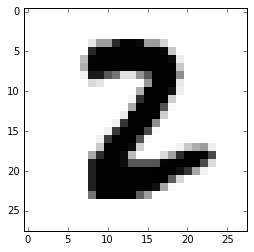

'\nEpoch: 0001 cost = 0.301498963\nEpoch: 0002 cost = 0.107252513\nEpoch: 0003 cost = 0.064888892\nEpoch: 0004 cost = 0.044463030\nEpoch: 0005 cost = 0.029951642\nEpoch: 0006 cost = 0.020663404\nEpoch: 0007 cost = 0.015853033\nEpoch: 0008 cost = 0.011764387\nEpoch: 0009 cost = 0.008598264\nEpoch: 0010 cost = 0.007383116\nEpoch: 0011 cost = 0.006839140\nEpoch: 0012 cost = 0.004672963\nEpoch: 0013 cost = 0.003979437\nEpoch: 0014 cost = 0.002714260\nEpoch: 0015 cost = 0.004707661\nLearning Finished!\nAccuracy: 0.9783\n'

In [11]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

'''
Epoch: 0001 cost = 0.301498963
Epoch: 0002 cost = 0.107252513
Epoch: 0003 cost = 0.064888892
Epoch: 0004 cost = 0.044463030
Epoch: 0005 cost = 0.029951642
Epoch: 0006 cost = 0.020663404
Epoch: 0007 cost = 0.015853033
Epoch: 0008 cost = 0.011764387
Epoch: 0009 cost = 0.008598264
Epoch: 0010 cost = 0.007383116
Epoch: 0011 cost = 0.006839140
Epoch: 0012 cost = 0.004672963
Epoch: 0013 cost = 0.003979437
Epoch: 0014 cost = 0.002714260
Epoch: 0015 cost = 0.004707661
Learning Finished!
Accuracy: 0.9783
'''